# Diagrama Circular con Python

Pablo Sao Alonzo - 13 de junio de 2022

Si no tenemos pandas instalado, podemos ejecutar la siguiente línea para su instalación. Si ya contamos con el paquete podemos omitir su ejecución

In [ ]:
!pip install pandas

Importamos la libreria de Pandas

In [1]:
import pandas as pd

Del archivo de datos "possum.csv", cargaremos únicamente los datos del sexo (**_sex_**) y edad (**_age_**). Si se desea conocer más sobre el método para cargar datos de un archivo CSV pueden hacerlo en el siguiente enlace [Cargando Datos de un CSV en Python con Pandas](https://www.solutiondesign.tech/cargando-datos-de-un-csv-en-python-con-pandas/)

In [2]:
datos = pd.read_csv( "possum.csv"
                    ,delimiter=','
                    ,usecols=['sex','age']
                   )

Utilizando el método _replace_ vamos a remplazar el valor _m_ por **Macho** y _f_ por **Hembra**, donde indicaremos que el cambio lo deseamos realizar en la columna **sex** de nuestro datafreame y los valores a cambiar se deberan pasar como un parametro del tipo _diccionario_, y para que el cambio sea preservado en el dataframe de nuestra variable datos, pasamos el valor **True** en nuestro parámetro _inplace_ _replace_ 

In [3]:
datos["sex"].replace({"m": "Macho", "f": "Hembra"}, inplace=True)

Ahora necesitamos contar cuantas hembras y machos hay en nuestra muestra, por lo que utilizamos el método _groupby_ indicando que **agruparemos** por los valroes de la columna **sex**. Este agrupamiento generará un tipo de dato **DataFrameGroupBy** por lo que seleccionaremos la columna que deseamos operar, en nuestro caso es "sex" por lo que seleccionamos la columna y utilizamos el método count para que al agruparlo este cuente cuantos machos y hembras hay. Finalmente restablecemos el índice con el método **reset_index** y por medio del parámetro **name** indicamos que el valor del conteo, lo coloque en la columna **count** y esta la almacenaremos en la nueva variable **datos_grafica**, sobre la cual estaremos trabajando más adelante

In [4]:
datos_grafica = datos.groupby('sex')["sex"].count().reset_index(name='count')

Verificamos los datos de nuestra agrupación

In [5]:
datos_grafica.head()

,sex,count
0,Hembra,43
1,Macho,61


## Graficando con Matplotlib

Si no se tiene instalado matplotlib, podemos ejecutar la siguiente línea para instalarlo desde el archivo de Jupyter Notebook

In [ ]:
!pip install matplotlib

Importamos la libreria de matplotlib para realizar gráficas

In [6]:
import matplotlib.pyplot as plt

Creamos la gráfica de pie con los datos contenidos en el *DataFrame* de la variable **datos_grafica**, utilizando la propiedad plot, dentro de nuestro *DataFrame*

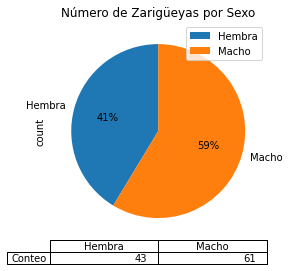

In [7]:
ax = datos_grafica.plot.pie( y='count'
                    ,title="Número de Zarigüeyas por Sexo"
                    ,startangle = 90
                    ,labels=['Hembra','Macho']
                    ,table=True
                    ,autopct='%.0f%%')

ax.table(cellText=[datos_grafica["count"]]
        ,colLabels=['Hembra','Macho']
        ,rowLabels=["Conteo"]
        )

## Graficando con Plotly

In [ ]:
!pip install plotly

In [8]:
import plotly.express as px

In [9]:
px.pie(datos_grafica
            ,values='count'
            ,names='sex'
            ,title="Número de Zarigüeyas por Sexo"
            ,labels={
                         'sex':'Sexo'
                        ,'count':'Cantidad'
                    }
            )